# CP Decomposition

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorly as tl
from tensorly.cp_tensor import CPTensor
from tensorly.tucker_tensor import TuckerTensor, tucker_to_tensor
from tensorly.tenalg import multi_mode_dot
import math
from tensorly.decomposition import parafac, non_negative_parafac
from scipy.interpolate import interp1d
import tlviz

## Import tensors

In [4]:
tensor_70 = np.load('tensors/tensor_70.npy')
tensor_100 = np.load('tensors/tensor_100.npy')
tensor_200 = np.load('tensors/tensor_200.npy')
tensor_300 = np.load('tensors/tensor_300.npy')

## Number of components

In [5]:
# we create a list with the tensors for more efficient coding
tensors = [tensor_70, tensor_100, tensor_200, tensor_300]
tensor_names = ['70', '100', '200', '300']

### CORCONDIA

In [56]:
def visualization_corcondia(model):
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    axes = axes.flatten()
    
    for i, (tensor, name) in enumerate(zip(tensors, tensor_names)):
        plt.sca(axes[i])
    
        models = {}
        for rank in [1, 2, 3, 4, 5, 6]:
            models[rank] = model(tensor, rank=rank)
        
        ax = tlviz.visualisation.scree_plot(models, tensor, metric="Core consistency")
        ax.set_ylim(0, 105)
        ax.set_title(f"Tensor {name}")
    
    plt.tight_layout()
    plt.show()

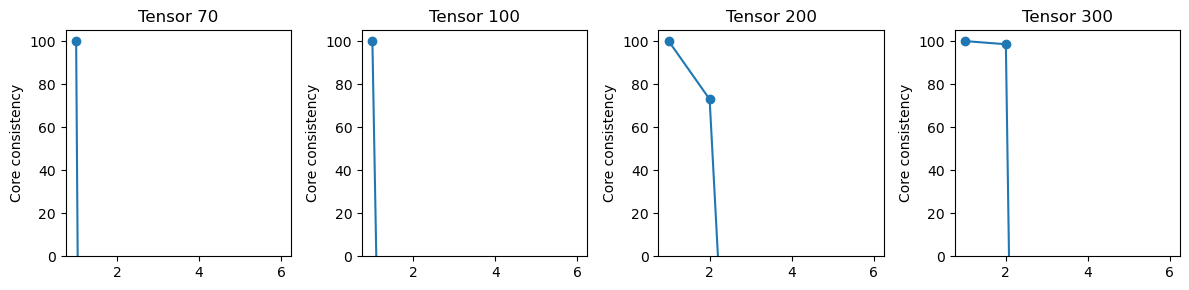

In [57]:
#parafac
visualization_corcondia(parafac)

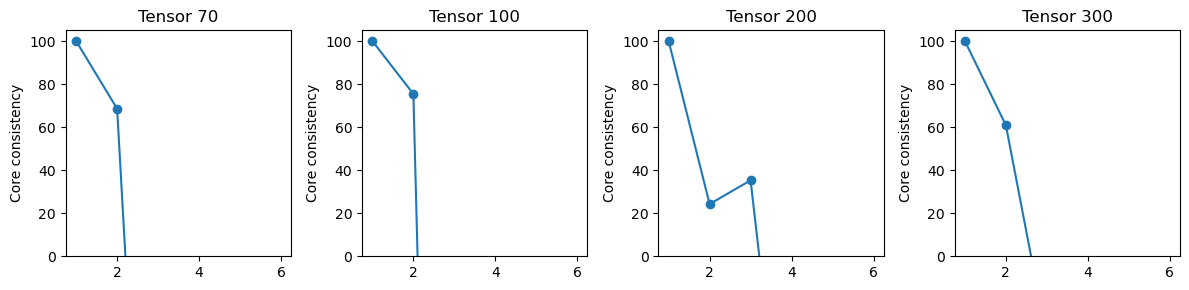

In [58]:
#non negative parafac
visualization_corcondia(non_negative_parafac)

### Reconstruction error

In [15]:
def error(original, res):
    # res is in CP
    if isinstance(res, CPTensor):
        res = res.to_tensor()
    
    # deal with cases when res is Tucker
    if isinstance(res, TuckerTensor):
        res = tucker_to_tensor(res)
        
    assert original.shape == res.shape
    return np.sum((original - res)**2) / np.sum(original**2)

In [38]:
def visualization_error(model):
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    axes = axes.flatten() 
    
    for ax, tensor, name in zip(axes, tensors, tensor_names):
        errors = pd.DataFrame(columns=["Num of Comps.", "Error"])
        for rr in np.arange(1, 7):
            model_ = model(tensor, rank=rr, normalize_factors=True)
            err = error(tensor, model_)
            errors.loc[len(errors)] = [rr, err]
        
        sns.pointplot(data=errors, x="Num of Comps.", y="Error", ax=ax)
        ax.set_title(f"Tensor {name}")
    
    plt.tight_layout()
    plt.show()

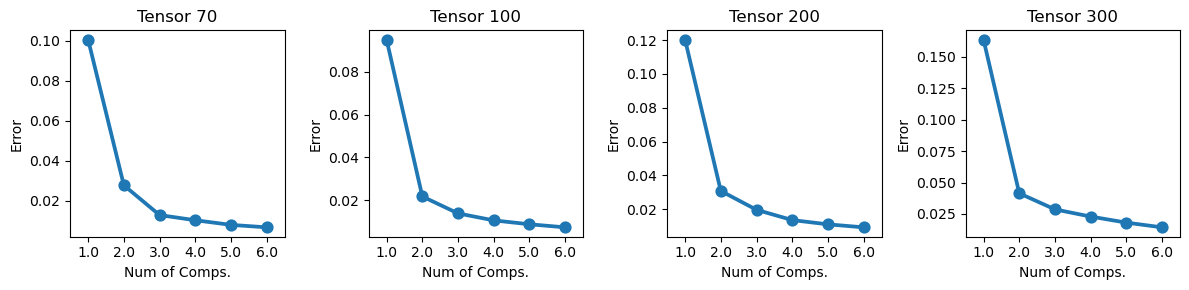

In [39]:
#parafac
visualization_error(parafac)

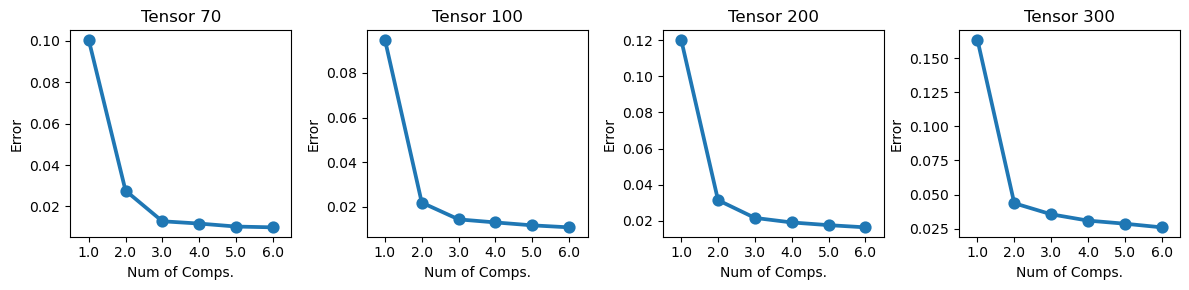

In [40]:
#non negative parafac
visualization_error(non_negative_parafac)

## Decompositions

In [65]:
def decomposition_visualization(factors):
    factor_labels = ["T Cells", "Time", "Patients"]
    x_labels = [range(f.shape[0]) for f in factors]
    
    num_components = factors[0].shape[1]
    
    fig, axes = plt.subplots(num_components, 3, figsize=(15, 4 * num_components))
    
    for component in range(num_components):
        for dim in range(3):
            ax = axes[component, dim]
            ax.plot(x_labels[dim], factors[dim][:, component], marker='o', linestyle='-')
            ax.set_title(f"Component {component+1} - {factor_labels[dim]}")
            ax.set_xlabel(factor_labels[dim])
            ax.set_ylabel("Weight")
    
    plt.tight_layout()
    plt.show()

### Tensor 70

#### Nonnegative PARAFAC

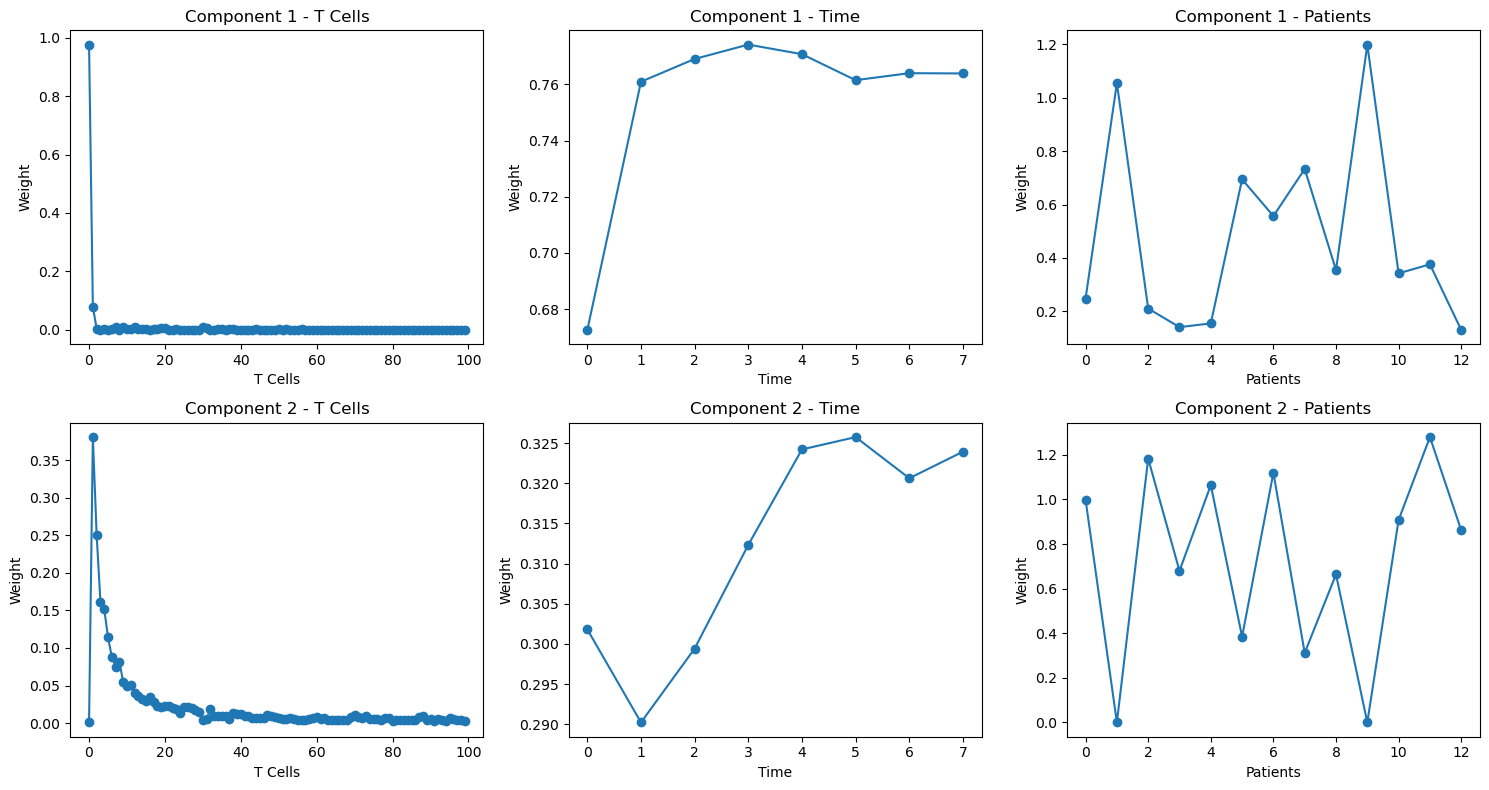

In [66]:
tensor_70 = tl.tensor(tensor_70)
weights_70, factors_70 = non_negative_parafac(tensor_70, rank=2)
decomposition_visualization(factors_70)

### Tensor 100

#### Nonnegative PARAFAC

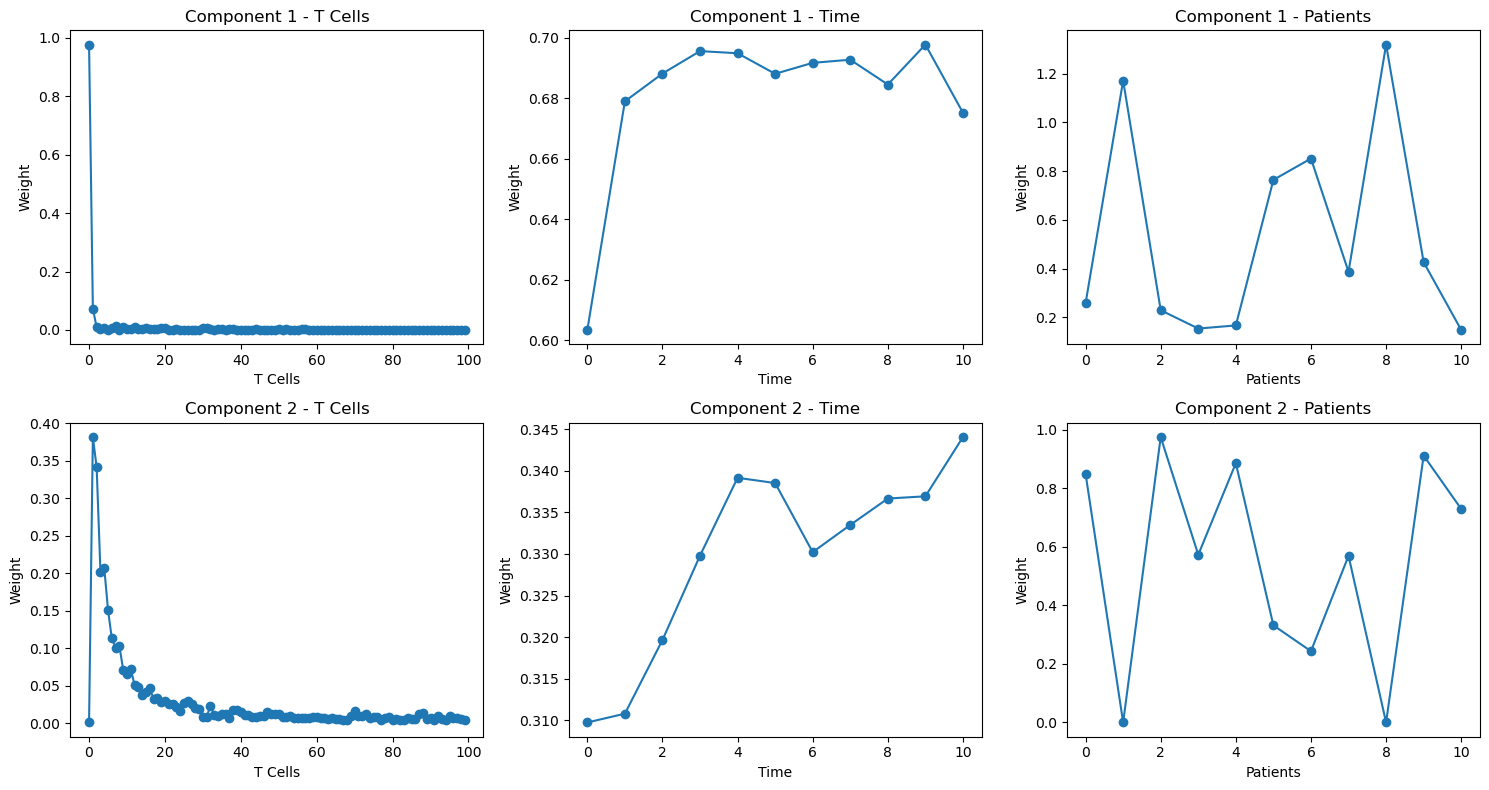

In [67]:
tensor_100 = tl.tensor(tensor_100)
weights_100, factors_100 = non_negative_parafac(tensor_100, rank=2)
decomposition_visualization(factors_100)

### Tensor 200

#### PARAFAC (CP)

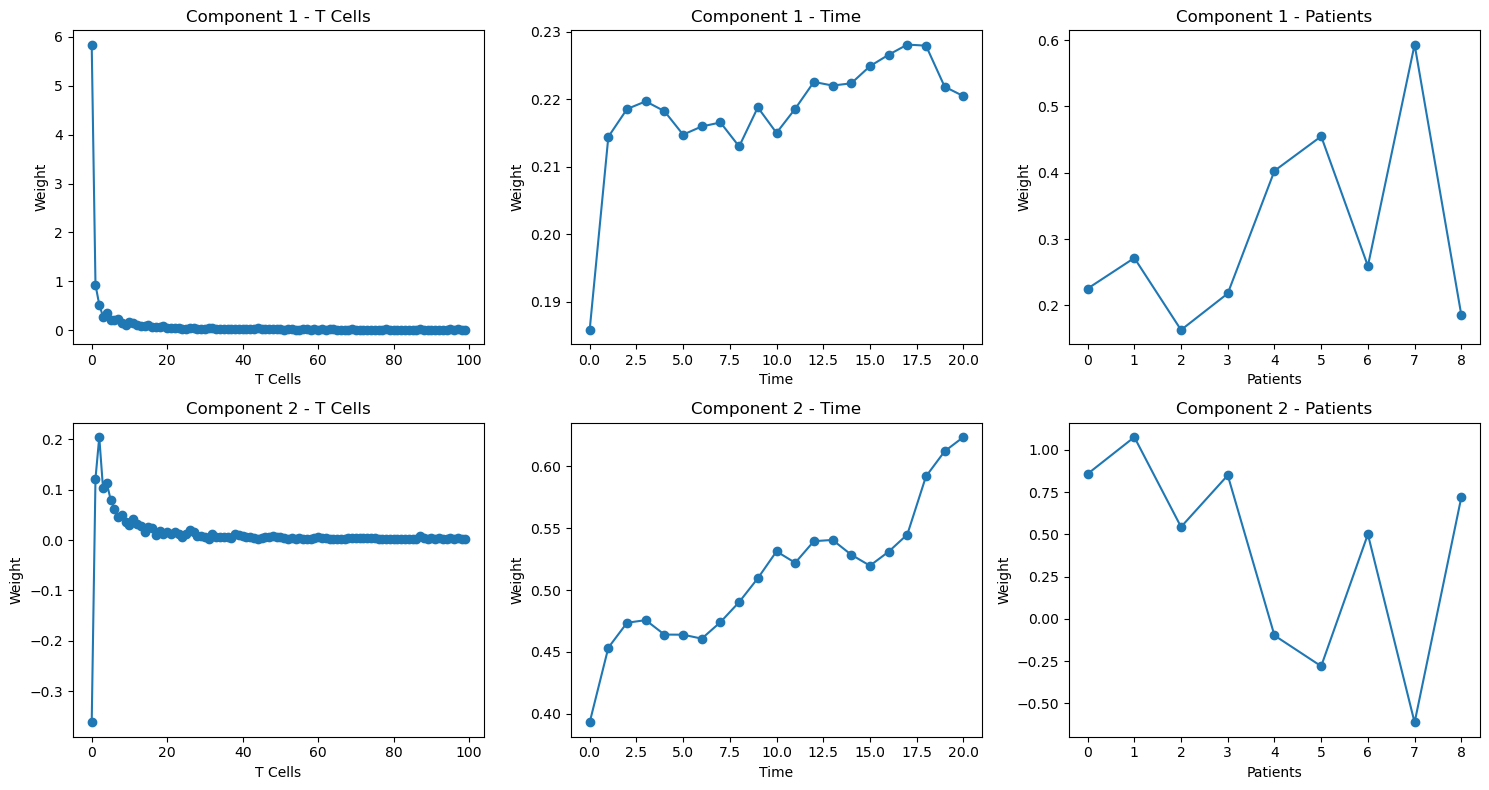

In [68]:
tensor_200 = tl.tensor(tensor_200)
weights_200, factors_200 = parafac(tensor_200, rank=2)
decomposition_visualization(factors_200)

### Tensor 300

#### PARAFAC (CP)

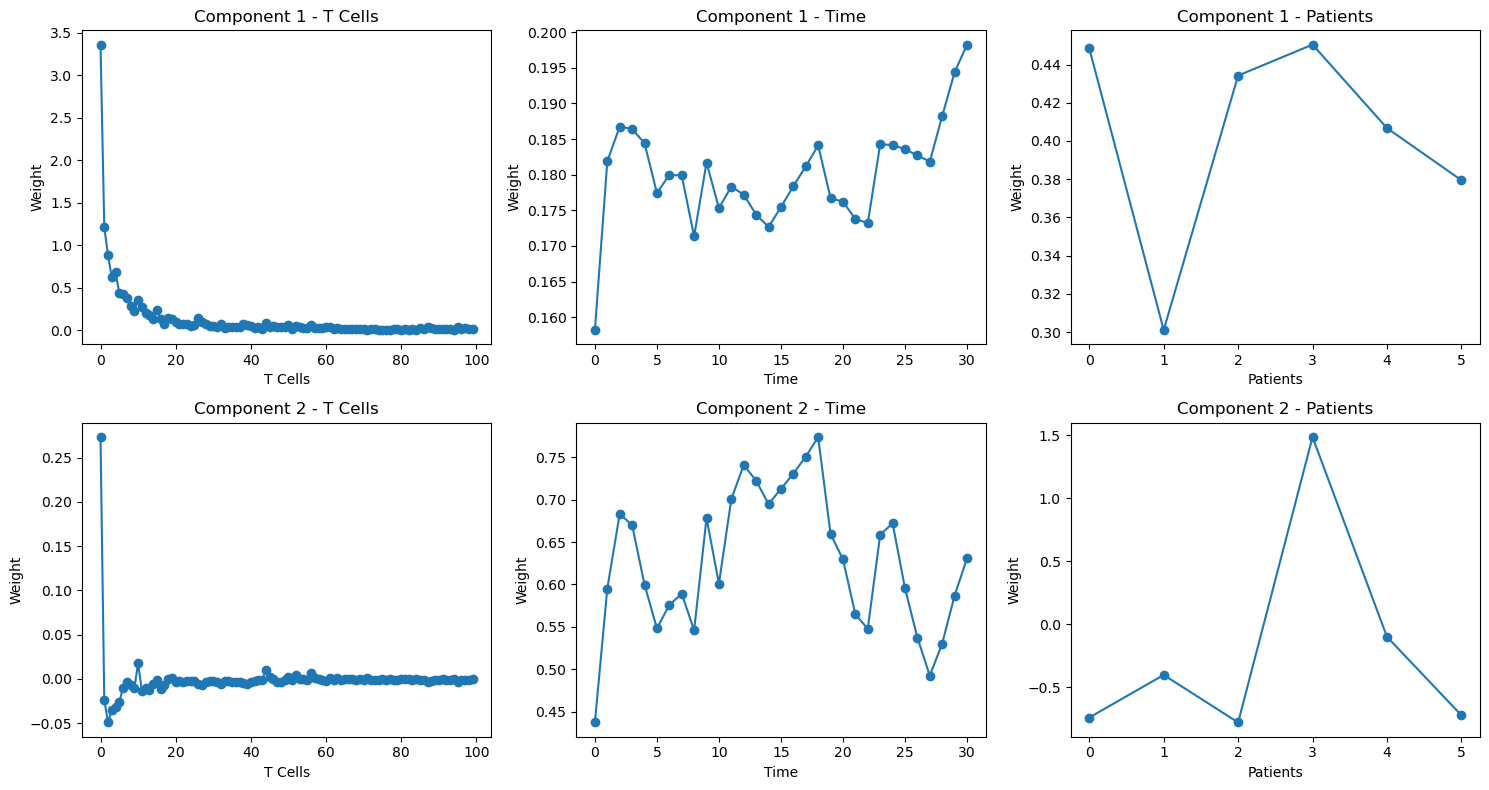

In [69]:
tensor_300 = tl.tensor(tensor_300)
weights_300, factors_300 = parafac(tensor_300, rank=2)
decomposition_visualization(factors_300)